In [4]:
import numpy as np
import seaborn as sns
from tqdm import trange
from scipy.stats import norm
from scipy.stats import uniform
import matplotlib.pyplot as plt

# plotting params
%matplotlib inline
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = (15.0, 8.0)
sns.set_style("white")

# path params
plot_dir = './plots/'

## 6.7 Importance Sampling for Off-Policy Estimation 

Recall that Monte Carlo sampling allows us to estimate the expectation of a random function by sampling from the corresponding probability distribution. More precisely, if p(x) is a 1-dim (continuous) probability density, and X ∼ p is a stochastic variable distributed according to this density p, then the expected value of some function f can be estimated using Monte Carlo
sampling by:

$$ E_p(f(X)) =\int f(x)p(x) dx \approx \frac{1}{n} \sum_{i=1}^{n}f(X_i)$$

for sample of independent $X_1, X_2,...,X_n ~p$.


## Importance Sampling

With importance sampling, we try to reduce the variance of our Monte-Carlo integral estimation by choosing a better distribution from which to simulate our random variables. It involves multiplying the integrand by 1 (usually dressed up in a “tricky fashion”) to yield an expectation of a quantity that varies less than the original integrand over the region of integration. Concretely,

$$\mathbb{E}_{p(x)} \big[\ f(x) \big] = \int f(x)\ p(x)\ dx = \int f(x)\ p(x)\ \frac{q(x)}{q(x)}\ dx = \int \frac{p(x)}{q(x)}\cdot f(x)\ q(x)\ dx = \mathbb{E}_{q(x)}  \big[\ f(x)\cdot \frac{p(x)}{q(x)} \big]$$

Thus, the MC estimation of the expectation becomes:

$$\mathbb{E}_{q(x)}  \big[\ f(x)\cdot \frac{p(x)}{q(x)} \big] \approx \frac{1}{N} \sum_{i=1}^{n} w_i \cdot f(x_i)$$

where $w_i = \dfrac{p(x_i)}{q(x_i)}$

1. Let $X ∼ N(0; 1)$ be a standard normal stochastic variable. Use importance sampling to estimate $E(X^2)$ by sampling from a uniform distribution $q ∼ U(−5; 5)$ on the interval $[−5; 5]$. What value do you expect (based on your knowledge of the normal distribution)? How accurate is your estimate based on importance sampling?

For a normal distribution it is simple to show: 
$$E[(X - \mu)^2] = \sigma$$ $$E[(X - 0)^2] = E[X^2] = \sigma$$
Therefore our empirical results should yield in $E(X^2) = 1$.


In [17]:
def Importance_Sampling_1(num_samples, plot=True):
    
    num_samples = int(num_samples)
    num_simulations = 1000
    
    # parameters of the probability distributions
    mu_1, sigma_1 = 0, 1
    a, b = -5, 5
    
    expected_value = []
    for i in range(num_simulations):
        # sample from the distributions
        Y = np.random.normal(mu_1, sigma_1, num_samples)
        X = np.random.uniform(a, b, num_samples)

        # setup pdfs
        norm_pdf = norm(mu_1, sigma_1)
        uniform_pdf = uniform(a, b-a)

        # calculate weight
        num = norm_pdf.pdf(X)
        denum = uniform_pdf.pdf(X)
        weights = num / denum

        # calculate X^2
        f_of_X = pow(X,2)
        f_of_Y = pow(Y,2)

        # calculate the expected value
        expected_value.append((weights.dot(f_of_X))/num_samples)
    
    # take statistical measures of the results from Impotance Sampling
    mean_expected_value = np.mean(expected_value)
    var_expected_value = np.var(expected_value)
    real_expected_value = sigma_1
    max_expected_value = max(expected_value)
    min_expected_value = min(expected_value)
            
    # print resuts
    print("===================================================")
    print("{} simulations".format(num_simulations))
    print("Importance Sampling of size {}".format(num_samples))
    print("Simulated Expected value: {}".format(mean_expected_value))
    print("Variance of the Expected value: {}".format(var_expected_value))
    print("Max $E(X^2)$: {} Min $E(X^2)$: {}".format(max_expected_value, min_expected_value))
    print("Actual Expected value: {}".format(real_expected_value))
    print("===================================================\n")
    
    # weight the samples from the normal distribuiton
    # it uses the last values of weights and f_of_X for ilustrations purposes only.
    IS_distribution = weights*f_of_X
    
    # plot and compare
    if plot:
        # histogram generated by Importance Sampling
        n, bins, patches = plt.hist(expected_value, 50, density=1, facecolor='green', alpha=0.75)
        plt.ylabel('Frequency')
        plt.xlabel(r'Expected Value')
        plt.title("Histogram, Importance Sampling")
        plt.grid(True)
        plt.savefig(plot_dir + 'histogram_expected_value{}.pdf'.format(num_samples), format='pdf', dpi=300)
        plt.show()
        
        # histogram from uniform samples weighted by the normal distribution
        n, bins, patches = plt.hist(IS_distribution, 50, density=1, facecolor='green', alpha=0.75)
        plt.ylabel('Number of Samples')
        plt.xlabel(r'$w*X^2$, X sampled from uniform distribution')
        plt.title("Histogram, Importance Sampling")
        plt.grid(True)
        plt.savefig(plot_dir + 'uniform_sample_histogram{}.pdf'.format(num_samples), format='pdf', dpi=300)
        plt.show()
        
        # histogram from normal samples
        n, bins, patches = plt.hist(f_of_Y, 50, density=1, facecolor='blue', alpha=0.75)
        plt.ylabel('Number of Samples')
        plt.xlabel(r'$Y^2$, sampled from normal distribution')
        plt.title("Histogram")
        plt.grid(True)
        plt.savefig(plot_dir + 'normal_sample_histogram{}.pdf'.format(num_samples), format='pdf', dpi=300)
        plt.show()
        
        # weights 
        plt.scatter(f_of_X, weights)
        plt.ylabel('weights')
        plt.xlabel(r'$X^2$')
        plt.title("Weights values")
        plt.grid(True)
        plt.savefig(plot_dir + 'weights{}.pdf'.format(num_samples), format='pdf', dpi=300)
        plt.show()
        
    

1000 simulations
Importance Sampling of size 10000
Simulated Expected value: 0.9993829218465732
Variance of the Expected value: 0.00011420863687332489
Max $E(X^2)$: 1.0418077474849756 Min $E(X^2)$: 0.9650181069394294
Actual Expected value: 1



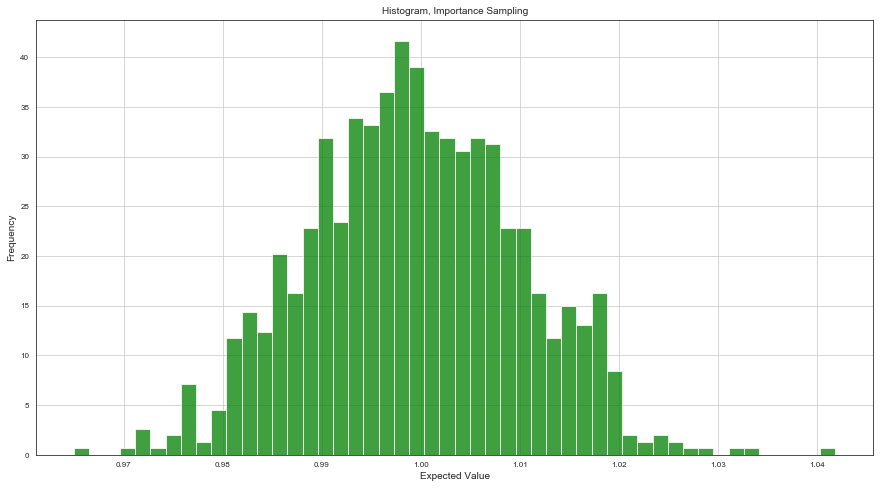

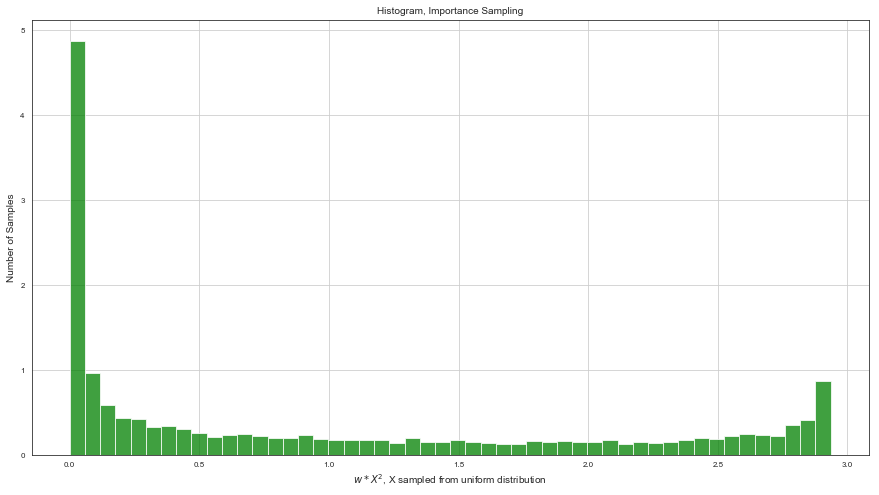

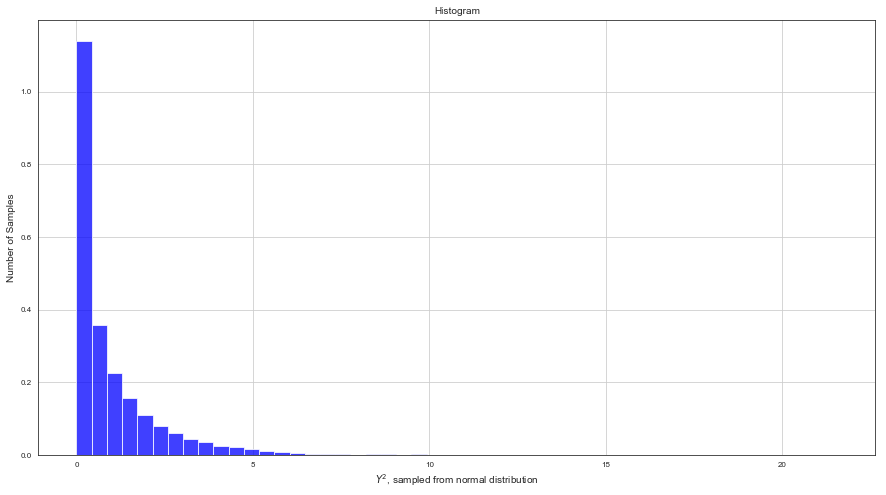

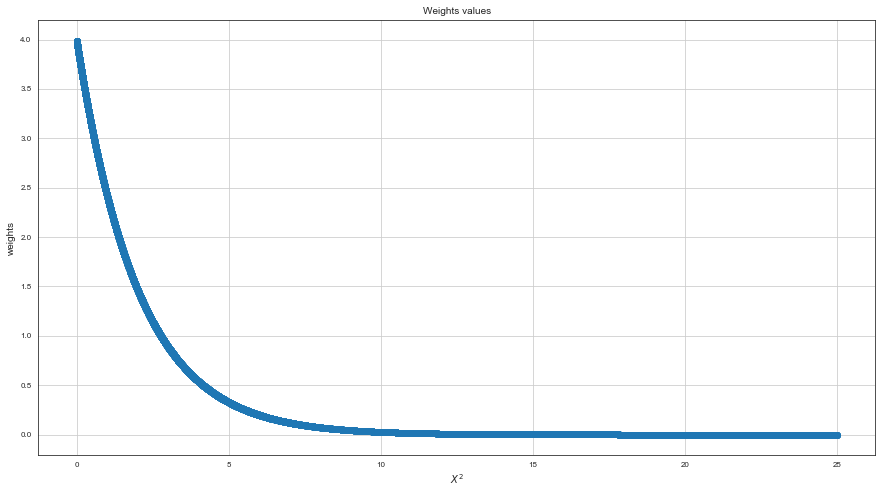

In [18]:
Importance_Sampling_1(1e4)

The results above show how good of a aproximator for the estimated value Importance Sampling is. The simulated $E(X^2)$ is very close to 1. We generated 1000 expected values by Impotance Sampling, each one of them used 10000 samples, the $E(X^2)$ range from 0.965 to 1.042 which are pretty close to one. If we assume the expected values to be normally distributed, then the standard deviation is ~$10^{-2}$ (square root of the variance) wich means that about 2/3 of the $E(X^2)$ will be in the interval $[0.99,1.01]$.

From those results we cam say, in a general way, that the results are accurate (the standard deviation is small) and precise (the simulated values are close to the real values).

2. Suppose some random process produces output $(−1 ≤ X ≤ 1)$ that is distributed according to the following continuous density:
$$p(x) = \frac{1 + cos(\pi x)}{2}$$

Again we are interested in estimation $E(X^2)$. Use importance sampling to estimate this value. Quantify the uncertainty on your result.

In [19]:
def Importance_Sampling_2(num_samples, plot=True):
    
    num_samples = int(num_samples)
    
    # parameters of the probability distributions
    a, b = -1, 1
    num_simulations = 1000
    
    expected_value = []
    for i in range(num_simulations):
        # sample from the distributions
        X = np.random.uniform(a, b, num_samples)

        # setup pdfs
        uniform_pdf = uniform(a, b-a)

        # calculate weight
        num = (1+ np.cos(np.pi*X))/2
        denum = uniform_pdf.pdf(X)
        weights = num / denum

        # calculate X^2
        f_of_X = pow(X,2)

        # calculate the expected value
        expected_value.append((weights.dot(f_of_X))/num_samples)
    
    # calculated here: http://www.wolframalpha.com/input/?i=integrate+(x%5E2+*++(1+%2B+cos(pi+*+x))+%2F+2),++x+in+%5B-1,+1%5D
    real_expected_value = 0.130691
    
    mean_expected_value = np.mean(expected_value)
    var_expected_value = np.var(expected_value)
    max_expected_value = max(expected_value)
    min_expected_value = min(expected_value)

    # print resuts
    print("===================================================")
    print("{} simulations".format(num_simulations))
    print("Importance Sampling of size {}".format(num_samples))
    print("Simulated Expected value: {}".format(mean_expected_value, var_expected_value))
    print("Variance of the Expected value: {}".format(var_expected_value))
    print("Max $E(X^2)$: {} Min $E(X^2)$: {}".format(max_expected_value, min_expected_value))
    print("Actual Expected value: {}".format(real_expected_value))
    print("===================================================\n")
    
    # weight the samples from the normal distribuiton
    IS_distribution = weights*f_of_X
    
    # plot and compare
    if plot:
        # histogram generated by Importance Sampling
        n, bins, patches = plt.hist(expected_value, 50, density=1, facecolor='green', alpha=0.75)
        plt.ylabel('Frequency')
        plt.xlabel(r'Expected Value')
        plt.title("Histogram, Importance Sampling")
        plt.grid(True)
        plt.savefig(plot_dir + 'histogram_expected_value{}.pdf'.format(num_samples), format='pdf', dpi=300)
        plt.show()
    
        # weights used for Importance Sampling
        plt.scatter(f_of_X, weights)
        plt.ylabel('weights')
        plt.xlabel(r'$X^2$')
        plt.title("Weights values")
        plt.grid(True)
        plt.savefig(plot_dir + 'weights{}.pdf'.format(num_samples), format='pdf', dpi=300)
        plt.show()
        

1000 simulations
Importance Sampling of size 10000
Simulated Expected value: 0.13065728563467968
Variance of the Expected value: 8.005134110248024e-07
Max $E(X^2)$: 0.13396208519522274 Min $E(X^2)$: 0.12795363940679524
Actual Expected value: 0.130691



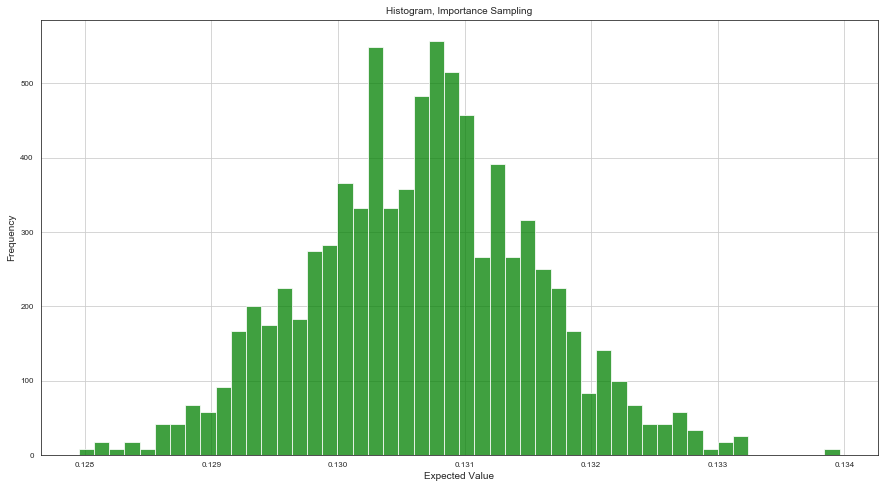

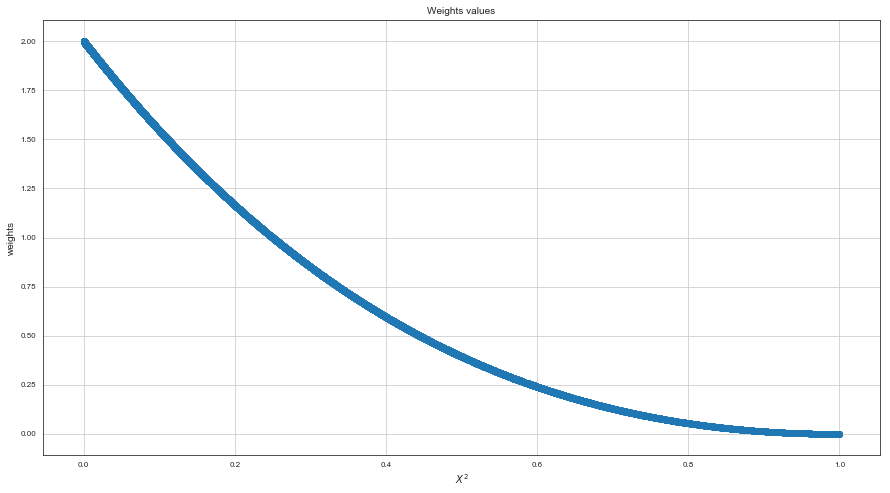

In [20]:
Importance_Sampling_2(1e4)

The results above show how good of a aproximator for the estimated value Importance Sampling is. The simulated $E(X^2)$ is very close to 0.13. We generated 1000 expected values by Impotance Sampling, each one of them used 10000 samples, the $E(X^2)$ range from 0.128 to 0.134 which are pretty close to the actual expected value:

integral_(-1)^1 1/2 x^2 (1 + cos(π x)) dx = 1/3 - 2/π^2≈0.13069

If we assume the expected values to be normally distributed, then the standard deviation is ~$10^{-3}$ (square root of the variance) which means that about 2/3 of the $E(X^2)$ will only deviate of 0.001 from the actual Expected Value.

## References

* http://ib.berkeley.edu/labs/slatkin/eriq/classes/guest_lect/mc_lecture_notes.pdf